In [20]:
from dolfin import *

In [21]:
mesh = UnitSquareMesh(20,20)

In [30]:
# Build function space
P2 = VectorElement("Lagrange", mesh.ufl_cell(), 2)
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
TH = P2 * P1
W = FunctionSpace(mesh, TH)

In [31]:
# Boundaries
def right(x, on_boundary): return x[0] > (1.0 - DOLFIN_EPS)
def left(x, on_boundary): return x[0] < DOLFIN_EPS
def top_bottom(x, on_boundary):
    return x[1] > 1.0 - DOLFIN_EPS or x[1] < DOLFIN_EPS

# No-slip boundary condition for velocity
noslip = Constant((0.0, 0.0))
bc0 = DirichletBC(W.sub(0), noslip, top_bottom)

# Inflow boundary condition for velocity
inflow = Expression(("-sin(x[1]*pi)", "0.0"), degree=2)
bc1 = DirichletBC(W.sub(0), inflow, right)

# Collect boundary conditions
bcs = [bc0, bc1]

In [32]:
# Define variational problem
(u, p) = TrialFunctions(W)
(v, q) = TestFunctions(W)
f = Constant((0, 0))
a = (inner(grad(u), grad(v)) - div(v)*p + q*div(u))*dx
L = inner(f, v)*dx

In [33]:
# Compute solution
w = Function(W)
solve(a == L, w, bcs)

# Split the mixed solution using deepcopy
# (needed for further computation on coefficient vector)
(u, p) = w.split(True)

Solving linear variational problem.


In [34]:
print("Norm of velocity coefficient vector: %.15g" % u.vector().norm("l2"))
print("Norm of pressure coefficient vector: %.15g" % p.vector().norm("l2"))

Norm of velocity coefficient vector: 28.3352066744342
Norm of pressure coefficient vector: 92.3573601660221


In [35]:
# Split the mixed solution using a shallow copy
(u, p) = w.split()

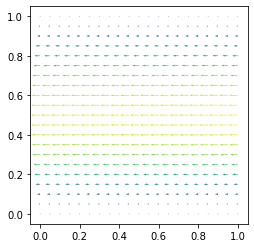

In [36]:
plot(u)

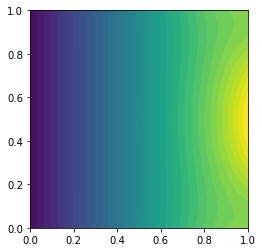

In [37]:
plot(p)

In [19]:
print(DOLFIN_EPS)

3e-16
